In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
#mpl.rcParams.update(mpl.rcParamsDefault)
%config InlineBackend.figure_format = 'retina'

#plt.style.use("seaborn-white")
print(plt.style.available)

#import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 80
#mpl.rcParams['figure.dpi'] = 300

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
!pip install matplotlib-venn

In [24]:
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles

## Two methods
- direct give the number of uniq and overlap
- let venn calculate

### Method 1: direct using numbers

In [71]:
color1 = "darkorange"
color2 = 'teal'
color3 = "blue"
color4 = "seagreen"

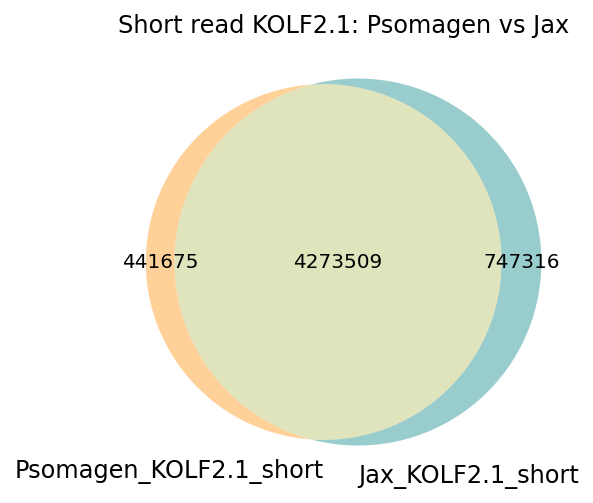

In [72]:
# subsets = (uniq_data1, uniq_data2, common)
plt.title('Short read KOLF2.1: Psomagen vs Jax')
v1=venn2(subsets = (441675, 747316, 4273509), set_labels = ('Psomagen_KOLF2.1_short', 'Jax_KOLF2.1_short'), 
         set_colors=(color1, color2))
plt.savefig('two_short_KOLF2.1.pdf')
plt.savefig('two_short_KOLF2.1.png', dpi=300)

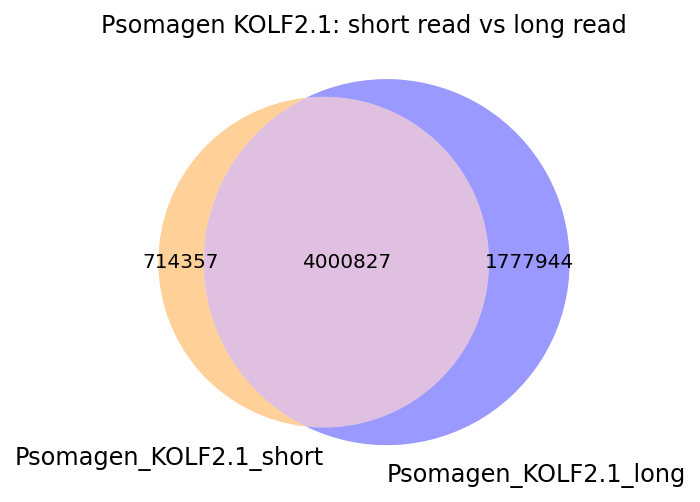

In [84]:
_=venn2(subsets = (714357, 1777944, 4000827), set_labels = ('Psomagen_KOLF2.1_short', 'Psomagen_KOLF2.1_long'), set_colors=(color1,color3))
plt.title("Psomagen KOLF2.1: short read vs long read")
plt.savefig('short_long_KOLF2.1.pdf')
plt.savefig('short_long_KOLF2.1.png', dpi=300)

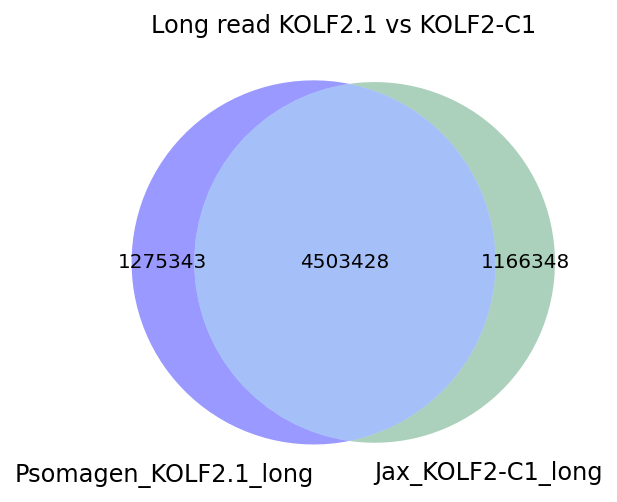

In [85]:
_=venn2(subsets = (1275343, 1166348, 4503428), set_labels = ('Psomagen_KOLF2.1_long', 'Jax_KOLF2-C1_long'),
       set_colors = (color3, color4))
plt.title("Long read KOLF2.1 vs KOLF2-C1")
plt.savefig('long.pdf')
plt.savefig('long.png', dpi=300)

## Use method2: more convienent for 3 sets of comparison

In [28]:
# read 3 sets of text files
# these files were copied from biowulf /data/CARD/tprojects/data/temp/short/
# 4 fields of chr, pos, REF, ALT were merged into one field
a = pd.read_csv("UNHS_GT19-38445_bcfc1_cut_merage.vcf", sep="\t", header=None)
a.head()
a.columns = ["A"]

,0
0,chr114397CTGTC
1,chr115903GGC
2,chr120094TAAT
3,chr120098CAGC
4,chr120316GAG


In [ ]:
b = pd.read_csv("Jax_KOLF2-ARID2-A2_bcfc1_cut_merage.vcf", sep="\t", header=None)
b.columns = ["B"]
b.head()

In [ ]:
c = pd.read_csv("long_psomagen_KOLF2.1_variants_cut_merage.vcf", sep="\t", header=None)
c.columns = ["C"]
c.head()

In [79]:
d = pd.read_csv("long_Jax_KOLF2C1_variants_cut_merage.vcf",sep="\t", header=None)
d.columns = ["D"]

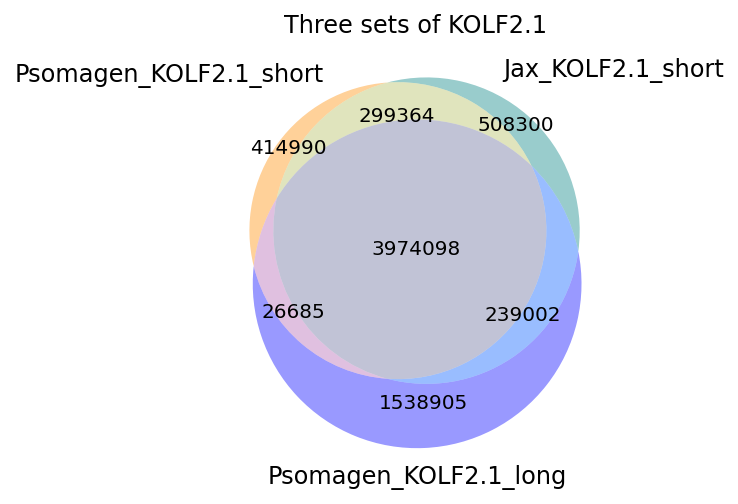

In [78]:
_=venn3([set(a["A"]), set(b["B"]), set(c["C"])], 
        set_labels = ('Psomagen_KOLF2.1_short', 'Jax_KOLF2.1_short', 'Psomagen_KOLF2.1_long'),
       set_colors=(color1, color2, color3))
plt.title("Three sets of KOLF2.1")
plt.savefig("3_kolf2.1.pdf")
plt.savefig("3_kolf2.1.png")

In [121]:
# calculate the pct 
print("psomagen_short: ", 3974098/len(a))
print("Jax_short: ", 3974098/len(b))
print("psomagen_long: ", 3974098/len(c))

psomagen_short:  0.8428298874444773
Jax_short:  0.7915229070919619
psomagen_long:  0.6877064344650445


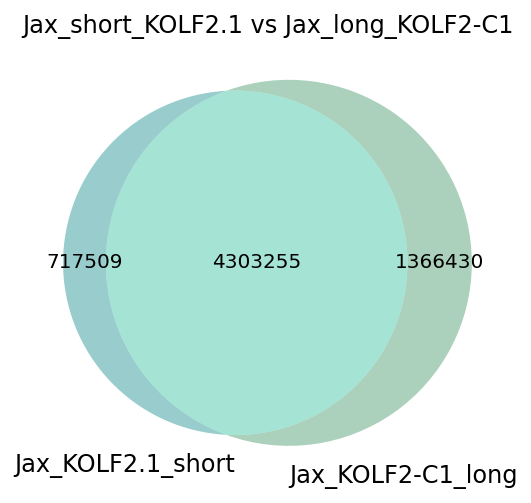

In [86]:
_=venn2([set(b["B"]), set(d["D"])], 
        set_labels = ('Jax_KOLF2.1_short', 'Jax_KOLF2-C1_long'),
       set_colors=(color2, color4))
plt.title("Jax_short_KOLF2.1 vs Jax_long_KOLF2-C1")
plt.savefig("Jax_2.pdf")
plt.savefig("Jax_2.png")

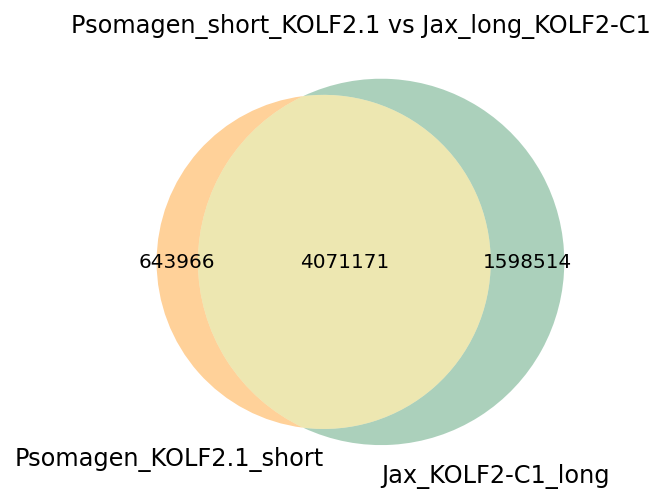

In [89]:
_=venn2([set(a["A"]), set(d["D"])], 
        set_labels = ('Psomagen_KOLF2.1_short', 'Jax_KOLF2-C1_long'),
       set_colors=(color1, color4))
plt.title("Psomagen_short_KOLF2.1 vs Jax_long_KOLF2-C1")
plt.savefig("KOLF2.1-C1-2.pdf")
plt.savefig("KOLF2.1-C1-2.png")

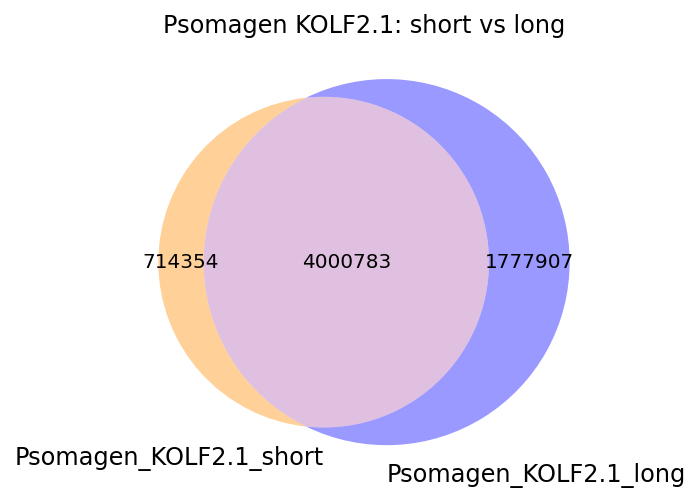

In [119]:
_=venn2([set(a["A"]), set(c["C"])], 
        set_labels = ('Psomagen_KOLF2.1_short', 'Psomagen_KOLF2.1_long'),
       set_colors=(color1, color3))
plt.title("Psomagen KOLF2.1: short vs long")
plt.savefig("Psomagen_KOLF2.1.pdf")
plt.savefig("Psomagen_KOLF2.1.png")

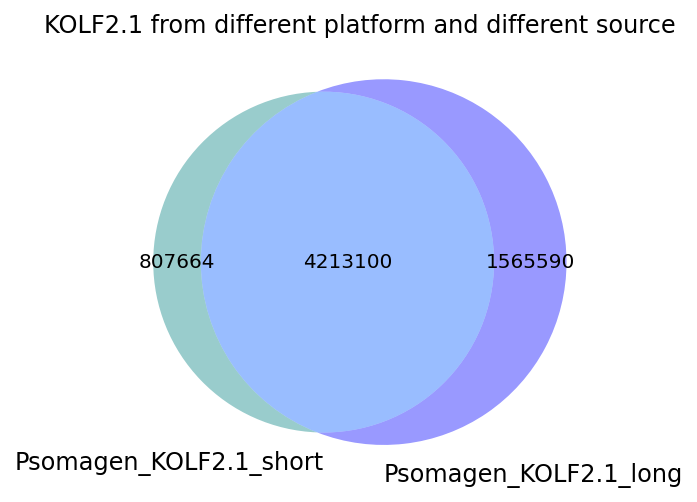

In [120]:
_=venn2([set(b["B"]), set(c["C"])], 
        set_labels = ('Psomagen_KOLF2.1_short', 'Psomagen_KOLF2.1_long'),
       set_colors=(color2, color3))
plt.title("KOLF2.1 from different platform and different source")
plt.savefig("KOLF2.1_2.pdf")
plt.savefig("KOLF2.1_2.png")

In [90]:
4273509 + 441675

4715184

In [92]:
747316 + 4273509

5020825

In [ ]:
Psomagen_KOLF2.1_short', 'Jax_KOLF2.1_short', 'Psomagen_KOLF2.1_long

In [96]:
# draw a reprensentive circle
# subsets = (uniq_data1, uniq_data2, common)
plt.title('Psomagen_KOLF2.1_short')
v1=venn2(subsets = (0, 0, 4715184), set_colors = (None, None)
         set_colors=(color1, color1))

SyntaxError: invalid syntax (<ipython-input-96-af7ab4dddeba>, line 5)

In [ ]:
color1 = "darkorange"
color2 = 'teal'
color3 = "blue"
color4 = "seagreen"

In [100]:
sizes=[110,0]

Text(0.5, 1.0, 'Psomagen_KOLF2.1_short')

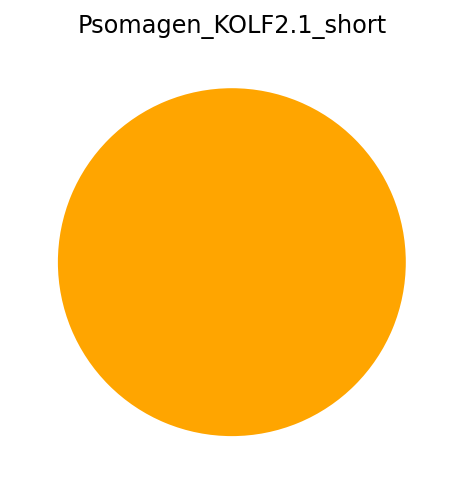

In [110]:
_=plt.pie(sizes, colors=["orange"])
plt.title("Psomagen_KOLF2.1_short")

Text(0.5, 1.0, 'Jax_KOLF2.1_short')

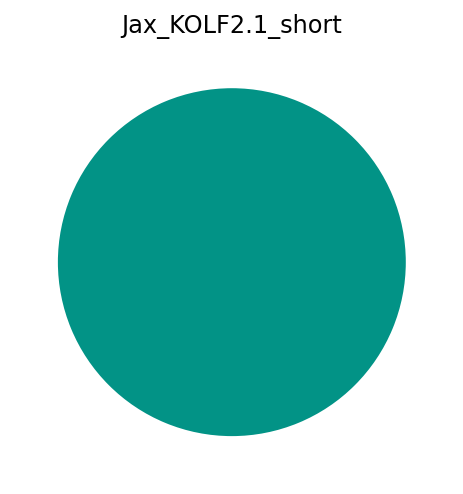

In [114]:
_=plt.pie(sizes, colors=["xkcd:teal"])
plt.title("Jax_KOLF2.1_short")

Text(0.5, 1.0, 'Psomagen_KOLF2.1_long')

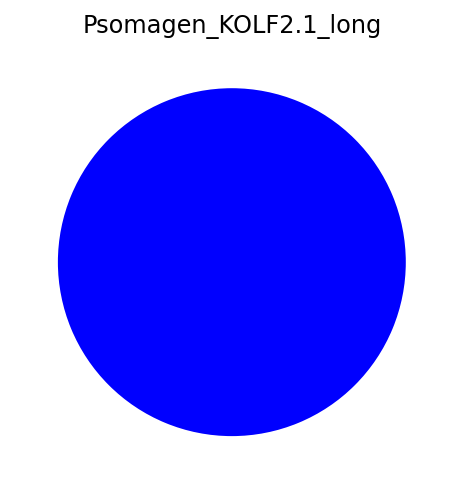

In [116]:
_=plt.pie(sizes, colors=["blue"])
plt.title("Psomagen_KOLF2.1_long")

Text(0.5, 1.0, 'Jax_KOLF2-C1_long')

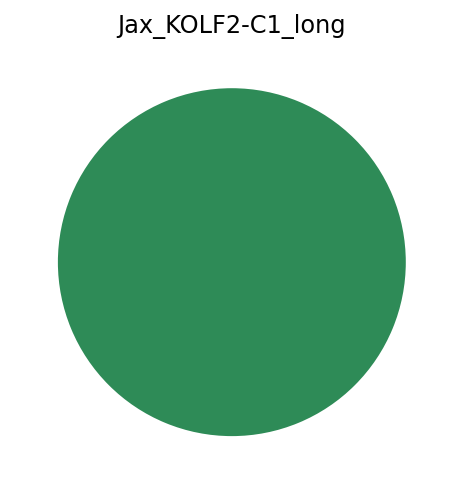

In [117]:
_=plt.pie(sizes, colors=["seagreen"])
plt.title("Jax_KOLF2-C1_long")